# Parsing dates



Points traités dans ce notebook :

- Configurer notre environnement
- Vérifier le type de données de notre colonne date
- Convertir nos colonnes de date en datetime
- Sélectionner uniquement le jour du mois dans notre colonne
- Tracer le jour du mois pour vérifier l'analyse de la date

# Mise en place de notre environnement

La première chose à faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous travaillerons avec deux ensembles de données : l'un contenant des informations sur les tremblements de terre survenus entre 1965 et 2016, et l'autre contenant des informations sur les glissements de terrain survenus entre 2007 et 2016.

In [9]:
# librairie
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# importer les données
earthquakes = pd.read_csv("/Users/jl/Downloads/earthquake-database-database.csv")
landslides = pd.read_csv("/Users/jl/Downloads/catalog.csv")
volcanos = pd.read_csv("/Users/jl/Downloads/volcanic-eruptions-database.csv")

# reproductibilité
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates

# Vérifier le type de données de notre colonne date

Pour cette partie du défi, je vais travailler avec la colonne date du dataframe glissements de terrain. La toute première chose que je vais faire est de jeter un coup d'œil aux premières lignes pour m'assurer qu'elles semblent contenir des dates.

In [10]:
# imprimer les premières lignes de la colonne date
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Oui, ce sont des dates ! Mais ce n'est pas parce que moi, un humain, je peux dire que ce sont des dates que Python sait que ce sont des dates. Remarquez qu'en bas de la sortie de head(), il est indiqué que le type de données de cette colonne est "object".

Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères.

Si vous consultez la documentation pandas sur les dtypes ici, vous remarquerez qu'il existe également un dtype spécifique datetime64. Parce que le dtype de notre colonne est object plutôt que datetime64, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons également regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [17]:
# vérifier le type de données de notre colonne date
landslides['date'].dtype

dtype('O')

Il se peut que vous deviez consulter la documentation numpy pour faire correspondre le code de la lettre au type d'objet. "O" est le code pour "object", nous pouvons donc voir que ces deux méthodes nous donnent la même information.

# Convertir nos colonnes de date en datetime

Maintenant que nous savons que notre colonne de dates n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme telle. C'est ce qu'on appelle "analyser les dates", car nous prenons une chaîne de caractères et identifions ses composants.

Nous pouvons déterminer le format de nos dates à l'aide d'un guide appelé "directive strftime".
L'idée de base est que vous devez indiquer quelles parties de la date se trouvent à quel endroit et quelle ponctuation se trouve entre elles. Il existe de nombreuses parties possibles d'une date, mais les plus courantes sont %d pour le jour, %m pour le mois, %y pour une année à deux chiffres et %Y pour une année à quatre chiffres.

Voici quelques exemples :

1/17/07 a le format "%m/%d/%y"
17-1-2007 a le format "%d-%m-%Y".

En regardant l'en-tête de la colonne de date dans l'ensemble de données sur les glissements de terrain, nous pouvons voir qu'elle est au format "mois/jour/année à deux chiffres", de sorte que nous pouvons utiliser la même syntaxe que dans le premier exemple pour analyser nos dates :

In [18]:
# créer une nouvelle colonne, date_parsed, avec les dates analysées
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Maintenant, lorsque je vérifie les premières lignes de la nouvelle colonne, je peux voir que le type de données est datetime64. Je constate également que mes dates ont été légèrement réorganisées de manière à correspondre à l'ordre par défaut des objets datetime (année-mois-jour).

In [19]:
# imprimer les premières lignes
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Maintenant que nos dates sont correctement analysées, nous pouvons interagir avec elles de manière utile.

Que faire si je rencontre une erreur avec plusieurs formats de date ? Alors que nous spécifions le format de la date ici, vous rencontrerez parfois une erreur lorsqu'il y a plusieurs formats de date dans une même colonne.

Dans ce cas, vous pouvez demander à pandas d'essayer de déduire le bon format de date.
Vous pouvez faire cela comme suit :
landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

Pourquoi ne pas toujours utiliser infer_datetime_format = True ?
Il y a deux raisons majeures de ne pas toujours laisser pandas deviner le format de l'heure.
La première est que les pandas ne seront pas toujours capables de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données.
La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.

# Sélectionner uniquement le jour du mois dans notre colonne

Ok, Rachael, vous vous dites peut-être à ce stade : "C'est bien de jouer avec les types de données, je suppose, mais quel est l'intérêt ?" Pour répondre à votre question, essayons d'obtenir des informations sur le jour du mois où un glissement de terrain s'est produit à partir de la colonne originale "date", qui a un type de données "objet" :

In [20]:
# essayer d'obtenir le jour du mois à partir de la colonne date
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

Nous avons obtenu une erreur ! La partie importante à regarder ici est la partie à la toute fin qui dit AttributeError : Can only use .dt accessor with datetimelike values. Nous obtenons cette erreur parce que la fonction dt.day() ne sait pas comment traiter une colonne de type "object". Même si notre dataframe contient des dates, nous ne pouvons pas interagir avec elles de manière utile car elles n'ont pas été analysées.

Heureusement, nous avons une colonne que nous avons analysée plus tôt et qui nous permet d'obtenir le jour du mois sans problème :

In [21]:
# obtient le jour du mois à partir de la colonne date_parsée
day_of_month_landslides = landslides['date_parsed'].dt.day

# Tracer le jour du mois pour vérifier l'analyse de la date

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() contient des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens.

Pour ce faire, traçons un histogramme des jours du mois. Nous nous attendons à ce que les valeurs soient comprises entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, à ce que la distribution soit relativement homogène. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) Voyons si c'est le cas :

/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_33772/2271159869.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31);


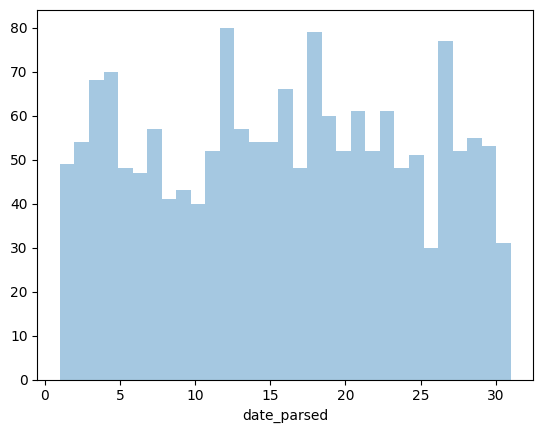

In [23]:
# supprimer les na
day_of_month_landslides = day_of_month_landslides.dropna()

# tracer le jour du mois
sns.distplot(day_of_month_landslides, kde=False, bins=31);

Oui, il semble que nous ayons correctement analysé nos dates et ce graphique me semble logique